<a href="https://colab.research.google.com/github/erivelton-jr/telecomx-churn-analysis/blob/main/churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X - Análise de Evasão de Clientes
Você foi contratado como assistente de análise de dados na Telecom X e fará parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.


-----

In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# 📌 Extração (E - Extract)

In [2]:
#extraindo os dados

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
df = pd.json_normalize(response.json(), sep='_')

In [3]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 🔧 Transformação (T - Transform)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [5]:
#verificando celulas vazias
print(df.eq('').sum())
print('---' * 15)
print(df.isnull().sum())
print('---' * 15)
print(df.eq(' ').sum())

customerID                     0
Churn                        224
customer_gender                0
customer_SeniorCitizen         0
customer_Partner               0
customer_Dependents            0
customer_tenure                0
phone_PhoneService             0
phone_MultipleLines            0
internet_InternetService       0
internet_OnlineSecurity        0
internet_OnlineBackup          0
internet_DeviceProtection      0
internet_TechSupport           0
internet_StreamingTV           0
internet_StreamingMovies       0
account_Contract               0
account_PaperlessBilling       0
account_PaymentMethod          0
account_Charges_Monthly        0
account_Charges_Total          0
dtype: int64
---------------------------------------------
customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0


Como podemos ver nenhuma coluna possui valores nulos, porém  a coluna `Churn` e `account_Charges_Total` possui colunas vazias

In [6]:
df.loc[df['Churn'] == ''].head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45


In [7]:
#como não sabemos se essas pessoas ainda são clientes ou não, vamos remover essas colunas
df.drop(df.loc[df['Churn'] == ''].index, inplace=True)
print(df.eq('').sum())

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


In [8]:
#como não sabemos o tipo de juros que foi pago pelo os usuarios, vamos remover as colunas de account_Charges_Total
df.drop(df.loc[df['account_Charges_Total'] == ' '].index, inplace=True)
print(df.eq('').sum())

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


In [9]:
#alterando tipo de dados
df['account_Charges_Total'] = df['account_Charges_Total'].astype(np.float64)
df['account_Charges_Total'].dtype

dtype('float64')

In [10]:
#criando coluna para sabermos a conta diaria de cada cliente
df['conta_cobranca_diaria'] = df['account_Charges_Monthly'] / (df['customer_tenure'] * 30)
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,conta_cobranca_diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0.242963
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0.221852
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,0.615833
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,0.251282
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,0.932222


In [11]:
#encontrando colunas que podem se tornar binarias
colunas_binarias = df.columns[df.apply(lambda col: set(col.dropna().unique()).issubset({'Yes', 'No', 'No internet service', 'No phone service'}))]

#aplicando valores binarios
for col in colunas_binarias:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': pd.NA, 'No phone service': pd.NA}).astype('Int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   Int64  
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   Int64  
 5   customer_Dependents        7032 non-null   Int64  
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   Int64  
 8   phone_MultipleLines        6352 non-null   Int64  
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    5512 non-null   Int64  
 11  internet_OnlineBackup      5512 non-null   Int64  
 12  internet_DeviceProtection  5512 non-null   Int64  
 13  internet_TechSupport       5512 non-null   Int64  
 1

In [13]:
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,conta_cobranca_diaria
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,0.242963
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,0.221852
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,0.615833
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,0.251282
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,0.932222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,0.141410
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,0.128939
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,0.838333
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,0.033756


In [14]:
# Traduzindo nome das colunas
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total',
       'conta_cobranca_diaria'],
      dtype='object')

In [134]:
colunas_traduzidas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelamento',
    'customer_gender': 'cliente_Genero',
    'customer_SeniorCitizen': 'cliente_Idoso',
    'customer_Partner': 'cliente_Parceiro',
    'customer_Dependents': 'cliente_Dependentes',
    'customer_tenure': 'tempo_de_contrato_cliente',
    'phone_PhoneService': 'telefone',
    'phone_MultipleLines': 'telefone_LinhasMultiplas',
    'internet_InternetService': 'internet',
    'internet_OnlineSecurity': 'internet_SegurancaOnline',
    'internet_OnlineBackup': 'internet_BackupOnline',
    'internet_DeviceProtection': 'internet_ProtecaoDispositivo',
    'internet_TechSupport': 'internet_SuporteTecnico',
    'internet_StreamingTV': 'internet_StreamingTV',
    'internet_StreamingMovies': 'internet_StreamingFilmes',
    'account_Contract': 'contrato',
    'account_PaperlessBilling': 'fatura_online',
    'account_PaymentMethod': 'metodo_pagamento',
    'account_Charges_Monthly': 'cobranca_mensal',
    'account_Charges_Total': 'cobranca_total',
    'conta_cobranca_diaria': 'cobranca_diaria'
}

# Exemplo de aplicação para renomear colunas no DataFrame df
df = df.rename(columns=colunas_traduzidas)

In [135]:
df.columns

Index(['ID_Cliente', 'Cancelamento', 'cliente_Genero', 'cliente_Idoso',
       'cliente_Parceiro', 'cliente_Dependentes', 'tempo_de_contrato_cliente',
       'telefone', 'telefone_LinhasMultiples', 'internet',
       'internet_SegurancaOnline', 'internet_BackupOnline',
       'internet_ProtecaoDispositivo', 'internet_SuporteTecnico',
       'internet_StreamingTV', 'internet_StreamingFilmes', 'contrato',
       'fatura_online', 'metodo_pagamento', 'cobranca_mensal',
       'cobranca_total', 'cobranca_diaria'],
      dtype='object')

# 📊 Carga e Análise (L - Load & Analysis)

In [136]:
# Análise descritiva
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cancelamento,7032.0,0.265785,0.441782,0.0,0.0,0.0,1.0,1.0
cliente_Idoso,7032.0,0.1624,0.368844,0.0,0.0,0.0,0.0,1.0
cliente_Parceiro,7032.0,0.482509,0.499729,0.0,0.0,0.0,1.0,1.0
cliente_Dependentes,7032.0,0.298493,0.457629,0.0,0.0,0.0,1.0,1.0
tempo_de_contrato_cliente,7032.0,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
telefone,7032.0,0.903299,0.295571,0.0,1.0,1.0,1.0,1.0
telefone_LinhasMultiples,6352.0,0.467097,0.498955,0.0,0.0,0.0,1.0,1.0
internet_SegurancaOnline,5512.0,0.365566,0.481632,0.0,0.0,0.0,1.0,1.0
internet_BackupOnline,5512.0,0.439949,0.496426,0.0,0.0,0.0,1.0,1.0
internet_ProtecaoDispositivo,5512.0,0.438679,0.496271,0.0,0.0,0.0,1.0,1.0


#### Análise de Evasão por Categoria

In [18]:
# Análise de evasão / Visualização de proporção em tabela
churn = (df['Cancelamento'].value_counts(normalize=True) *  100).round(2)
churn.index = ['Não', 'Sim']
churn.astype(str) + '%'

,proportion
Não,73.42%
Sim,26.58%


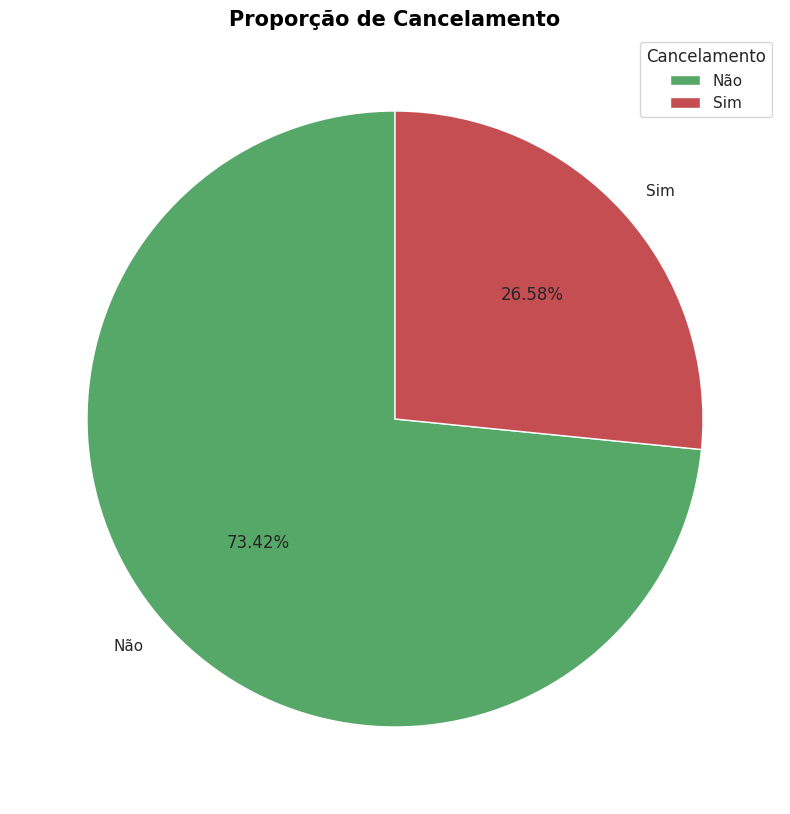

In [19]:
# Visualizaação dos dados em grafico
fix, ax = plt.subplots(figsize=(10, 10))
sns.set_theme(style='whitegrid')
sns.set_palette('pastel')

plt.pie(churn, labels=churn.index, autopct='%1.2f%%',
        startangle=90, colors=['g', 'r'])

#Legenda
plt.legend(title='Cancelamento')

#Titulo
plt.title('Proporção de Cancelamento', fontsize=15,
          fontweight='bold')

plt.show()
plt.show()


In [20]:
# Evasão por genero
churn_genero = (df.groupby('cliente_Genero')['Cancelamento'].value_counts(normalize=True) * 100).round(2).reset_index()
churn_genero

,cliente_Genero,Cancelamento,proportion
0,Female,0,73.04
1,Female,1,26.96
2,Male,0,73.8
3,Male,1,26.2


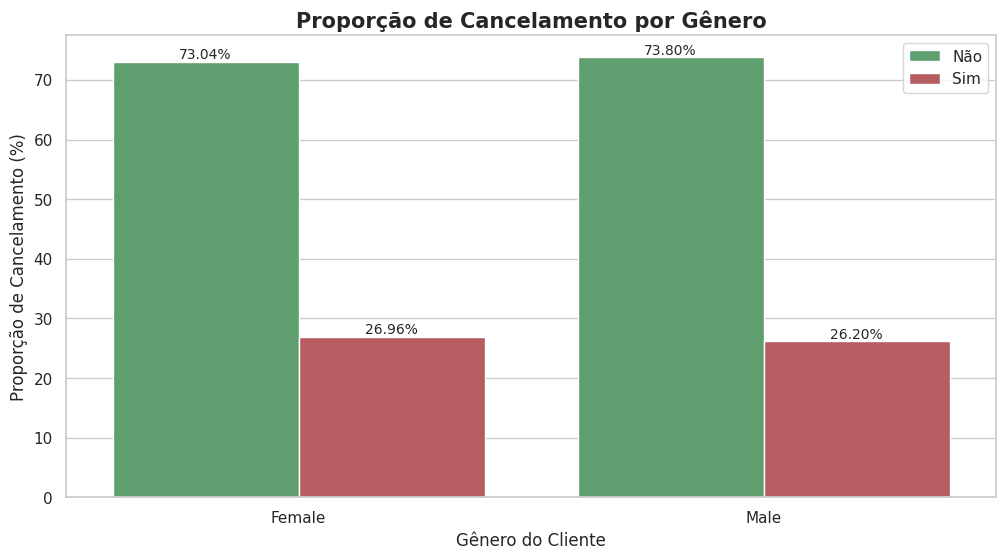

In [21]:
fix, ax = plt.subplots(figsize=(12,6))

sns.barplot(x='cliente_Genero', y='proportion', hue='Cancelamento', data=churn_genero, palette=['g', 'r'], ax=ax)

# Titulos e Legendas
plt.xlabel('Gênero do Cliente')
plt.ylabel('Proporção de Cancelamento (%)')
plt.title('Proporção de Cancelamento por Gênero', fontsize=15, fontweight='bold')

# Lengenda
plt.legend(title='Cancelamento')
L = plt.legend()
L.get_texts()[0].set_text('Não')
L.get_texts()[1].set_text('Sim')

ax.bar_label(ax.containers[0], fontsize=10, fmt='%.2f%%')
ax.bar_label(ax.containers[1], fontsize=10, fmt='%.2f%%')

plt.show()

In [22]:
churn_por_contrato = (df.groupby('contrato')['Cancelamento'].value_counts(normalize=True) * 100).reset_index()
churn_por_contrato

,contrato,Cancelamento,proportion
0,Month-to-month,0,57.290323
1,Month-to-month,1,42.709677
2,One year,0,88.722826
3,One year,1,11.277174
4,Two year,0,97.151335
5,Two year,1,2.848665


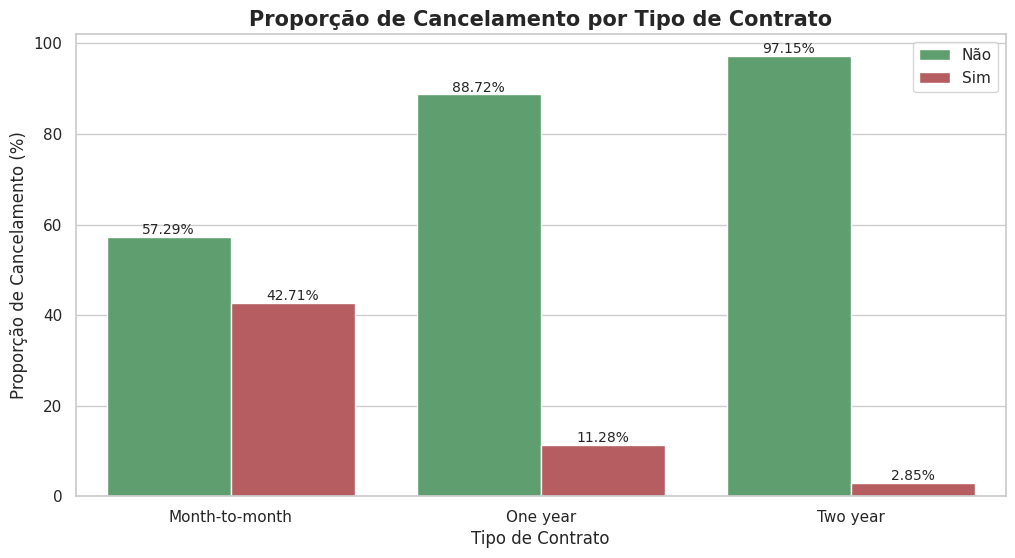

In [23]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x='contrato', y='proportion', hue='Cancelamento', data=churn_por_contrato, palette=['g', 'r'], ax=ax)

# Titulos e Legendas
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporção de Cancelamento (%)')
plt.title('Proporção de Cancelamento por Tipo de Contrato', fontsize=15, fontweight='bold')

# Lengenda
plt.legend(title='Cancelamento')
L = plt.legend()
L.get_texts()[0].set_text('Não')
L.get_texts()[1].set_text('Sim')

# Bar Label
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.2f%%')
ax.bar_label(ax.containers[1], fontsize=10, fmt='%.2f%%')

plt.show()

A partir do gráfico percebemos que quanto maior o tempo de contrato, menor é a taxa de evasão.

In [24]:
churn_idoso = (df.groupby('cliente_Idoso')['Cancelamento'].value_counts(normalize=True) * 100).reset_index()
churn_idoso

,cliente_Idoso,Cancelamento,proportion
0,0,0,76.349745
1,0,1,23.650255
2,1,0,58.318739
3,1,1,41.681261


/tmp/ipython-input-25-3700840341.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


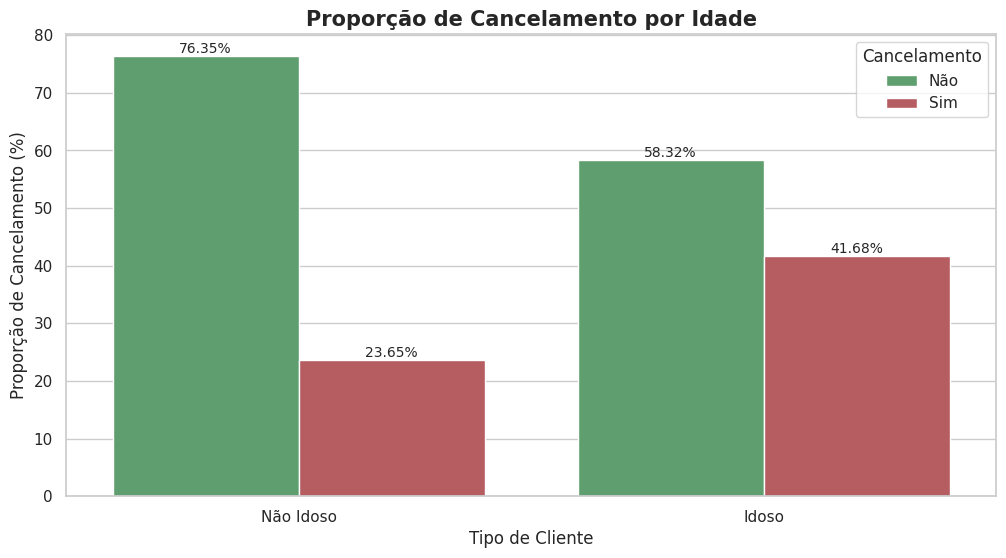

In [25]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x='cliente_Idoso', y='proportion', hue='Cancelamento', data=churn_idoso, palette=['g', 'r'], ax=ax)

# Titulos e Legendas
plt.xlabel('Tipo de Cliente')
plt.ylabel('Proporção de Cancelamento (%)')
plt.title('Proporção de Cancelamento por Idade', fontsize=15, fontweight='bold')

# Lengenda
L = plt.legend(title='Cancelamento')
L.get_texts()[0].set_text('Não')
L.get_texts()[1].set_text('Sim')

# Bar Label
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.2f%%')
ax.bar_label(ax.containers[1], fontsize=10, fmt='%.2f%%')

# Legenda Categorias
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Não Idoso'
labels[1] = 'Idoso'
ax.set_xticklabels(labels)

plt.show()

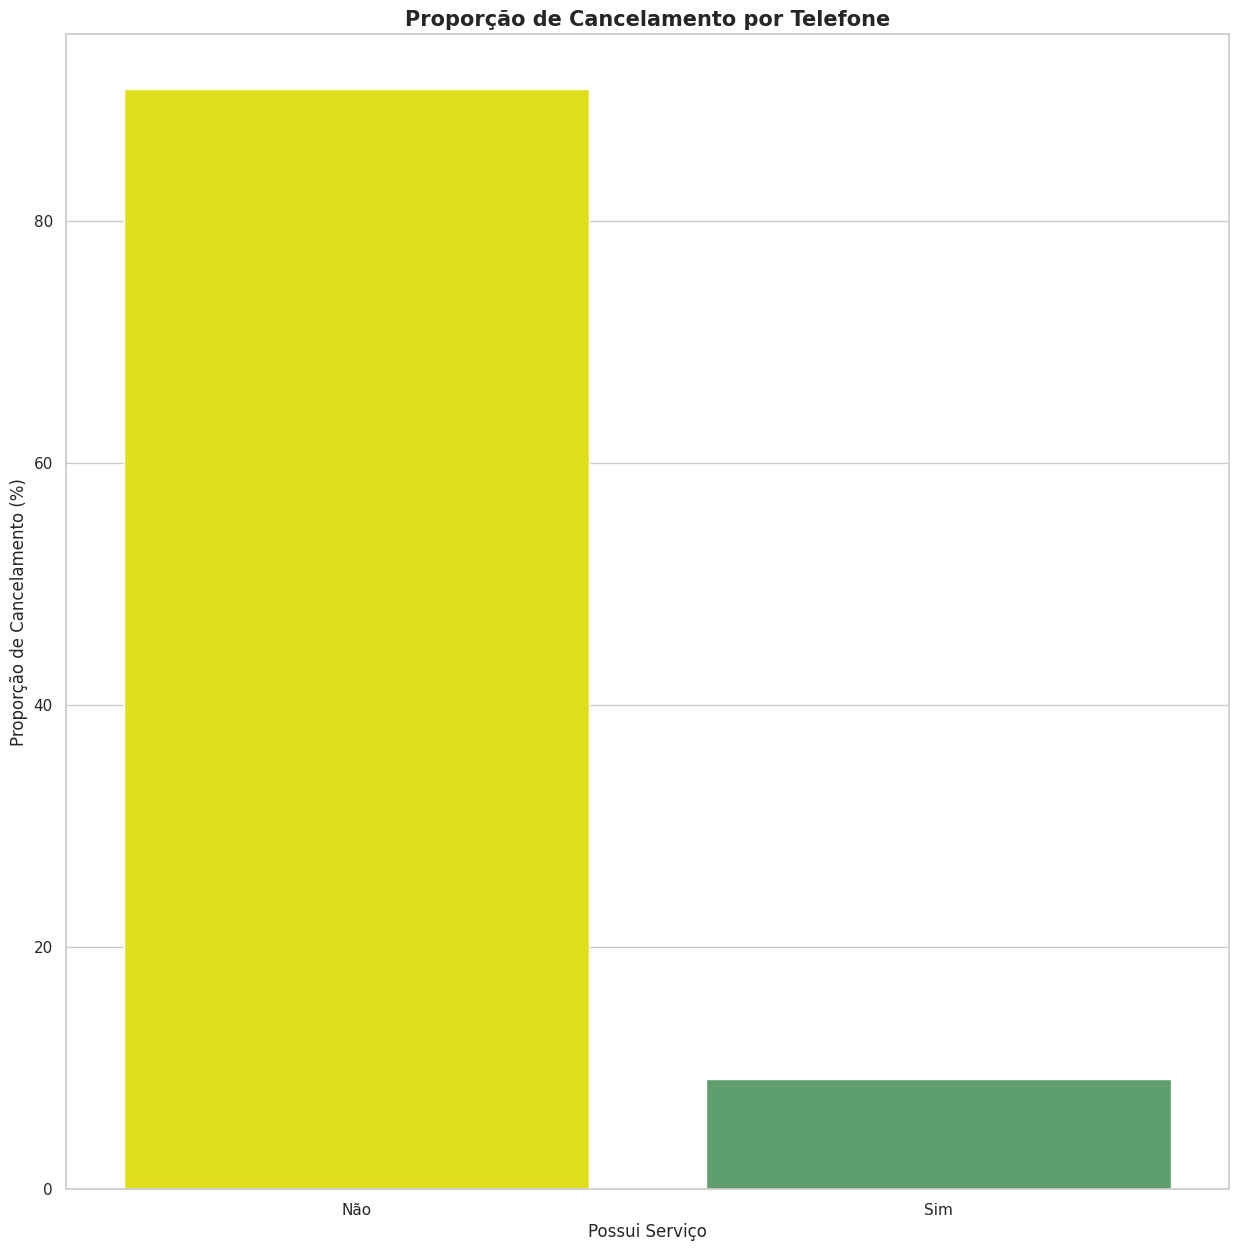

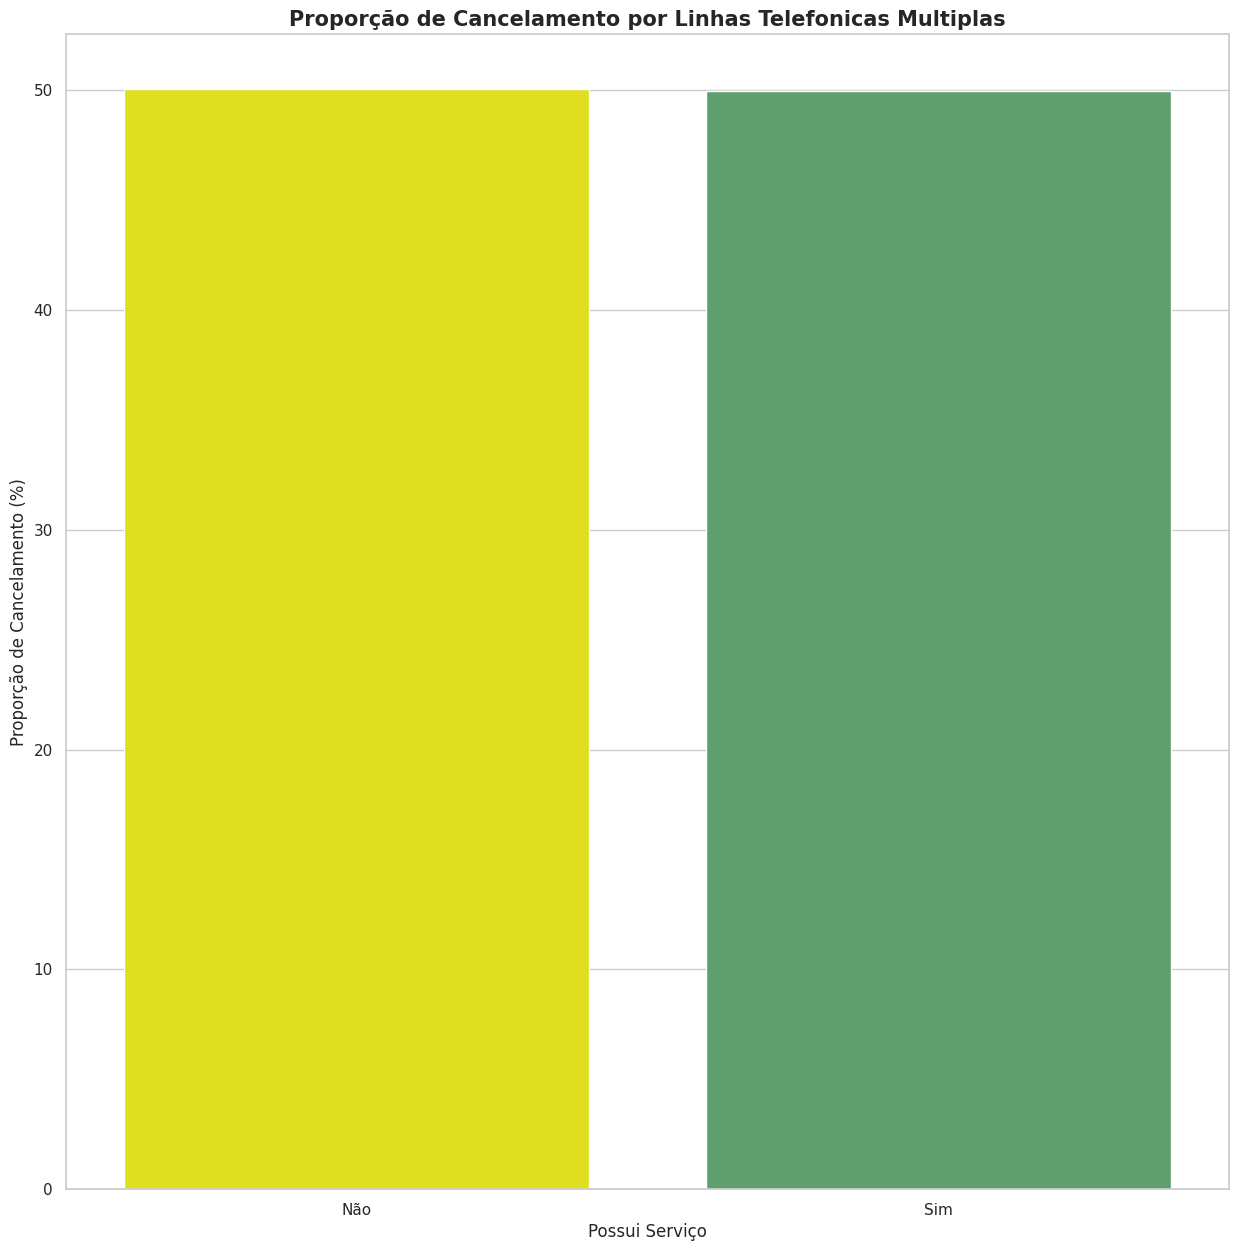

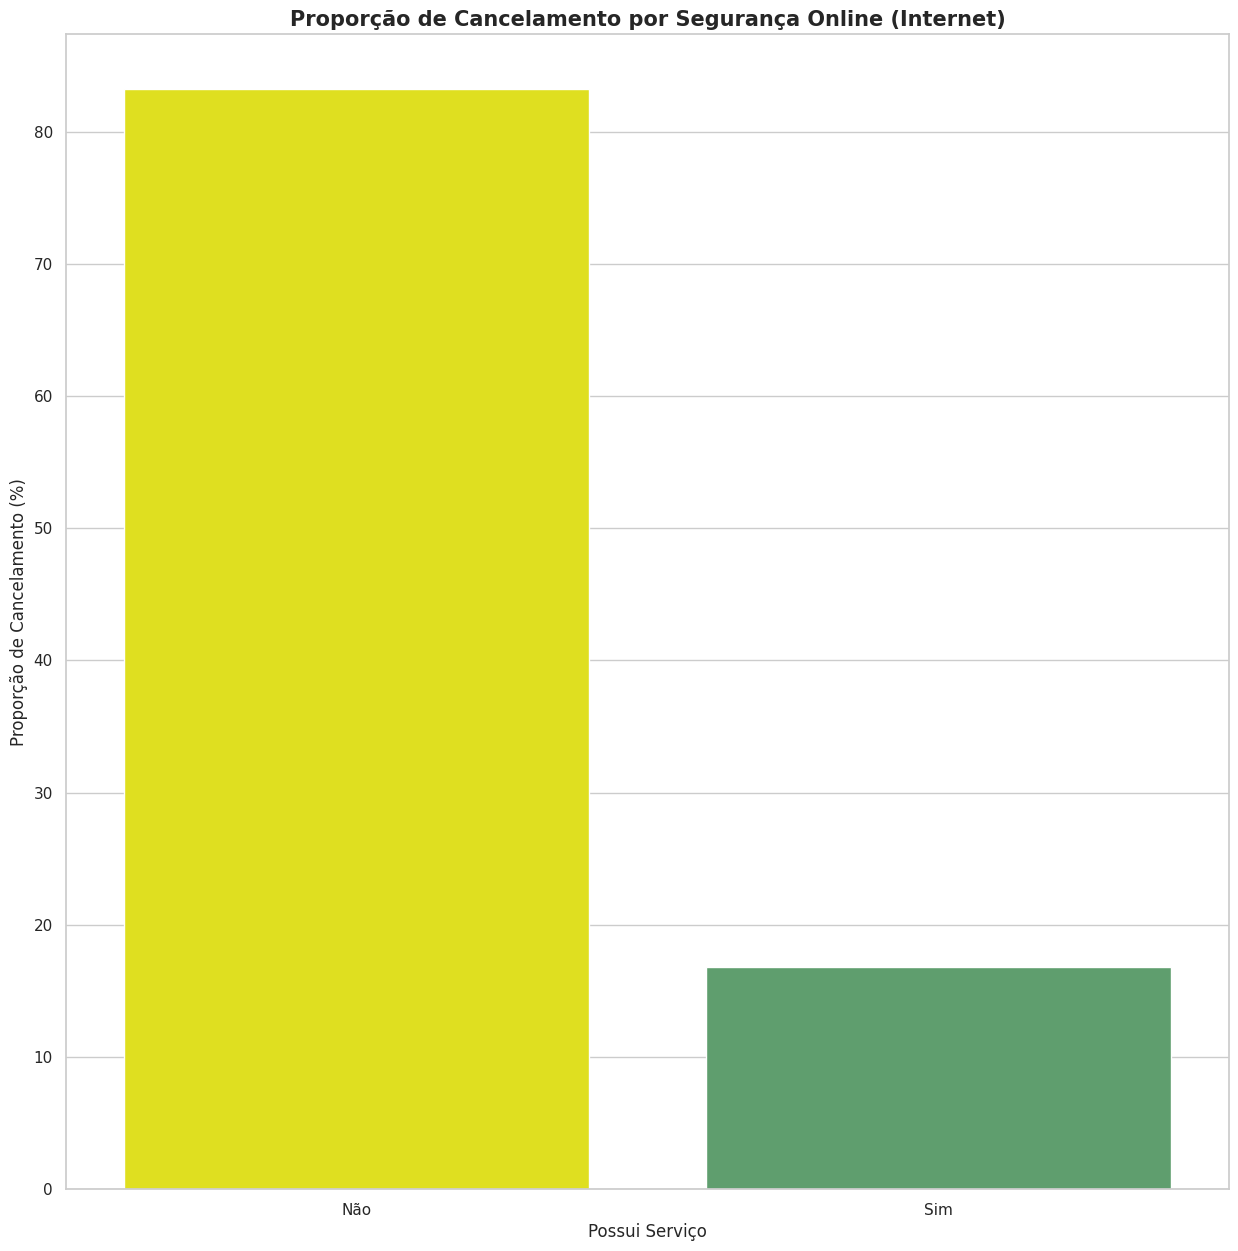

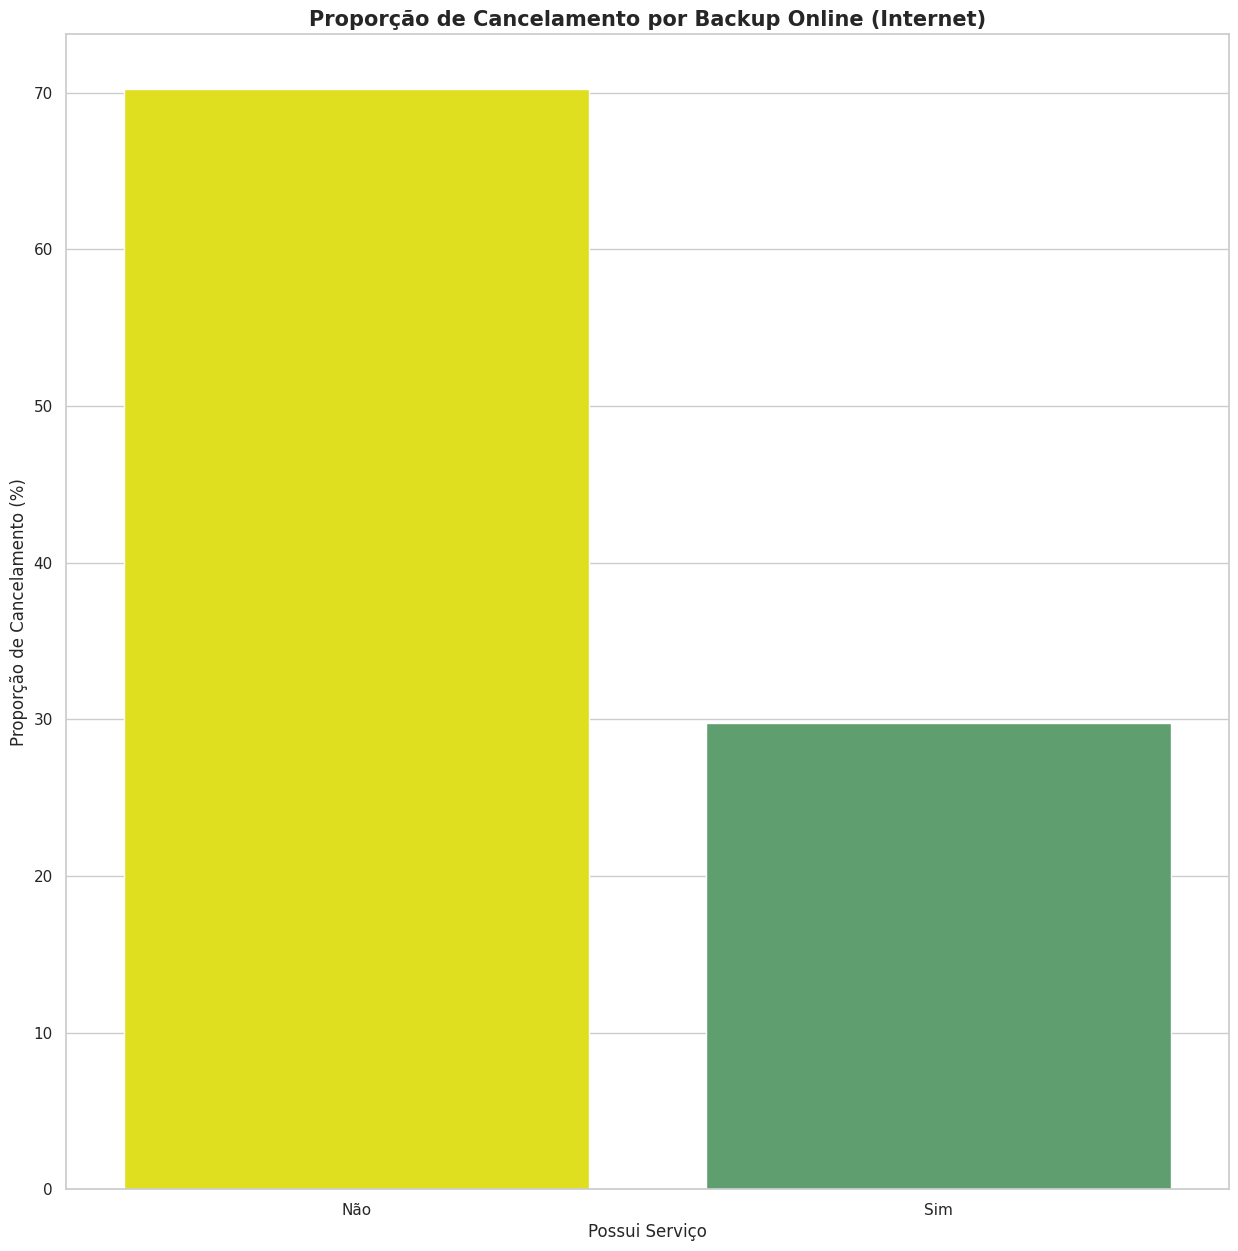

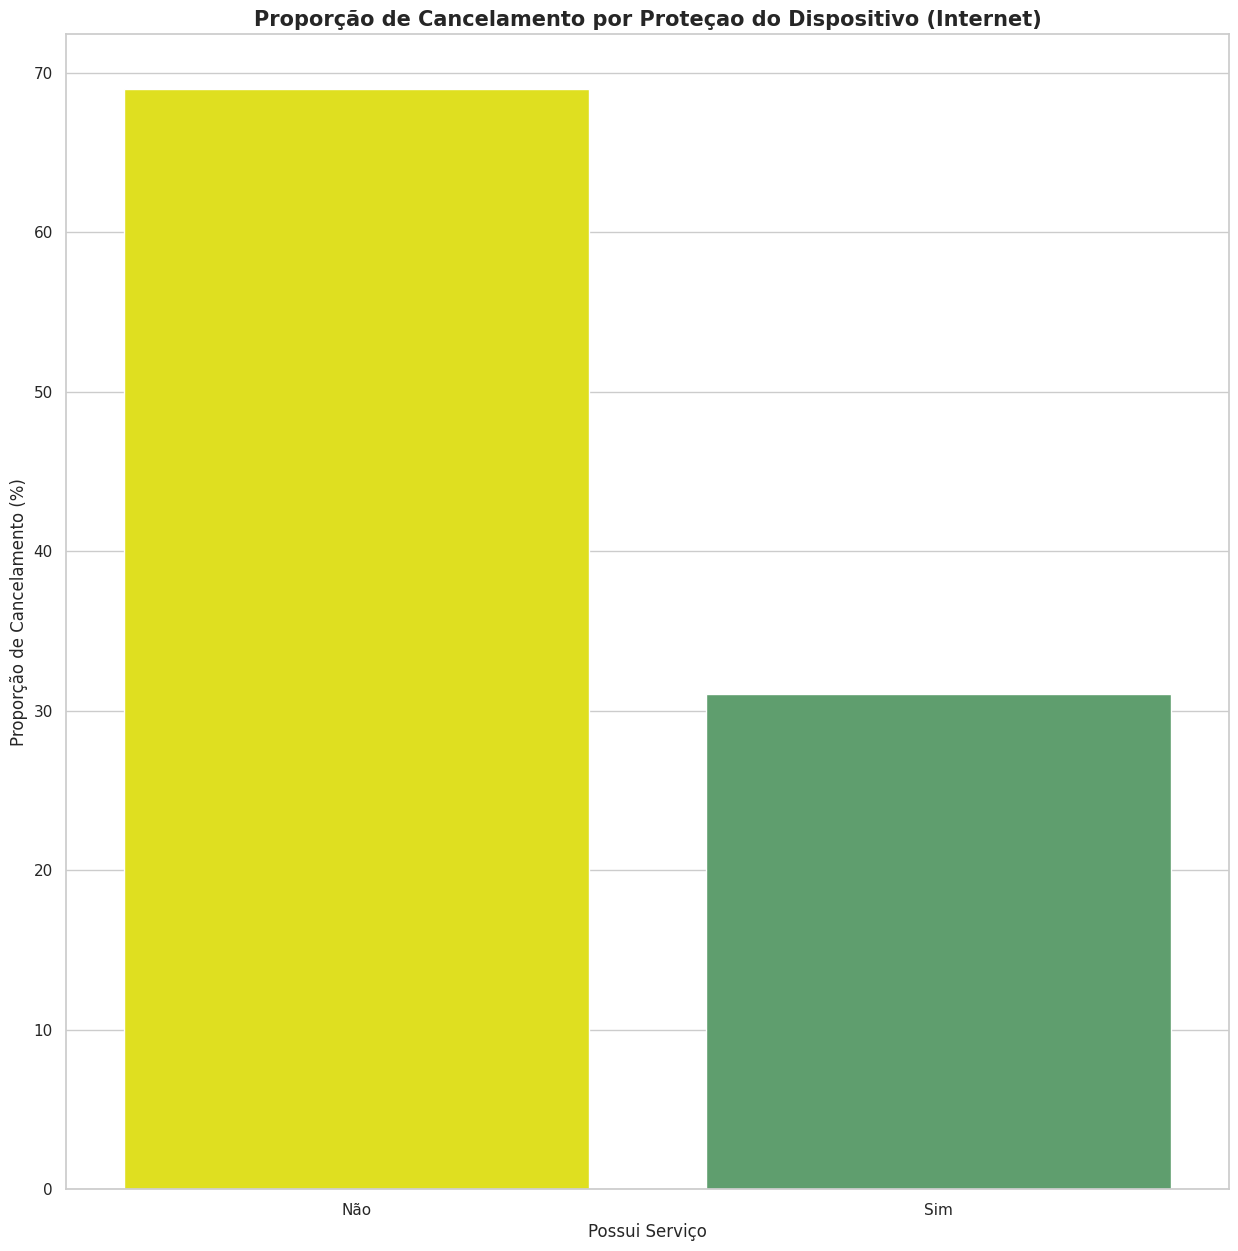

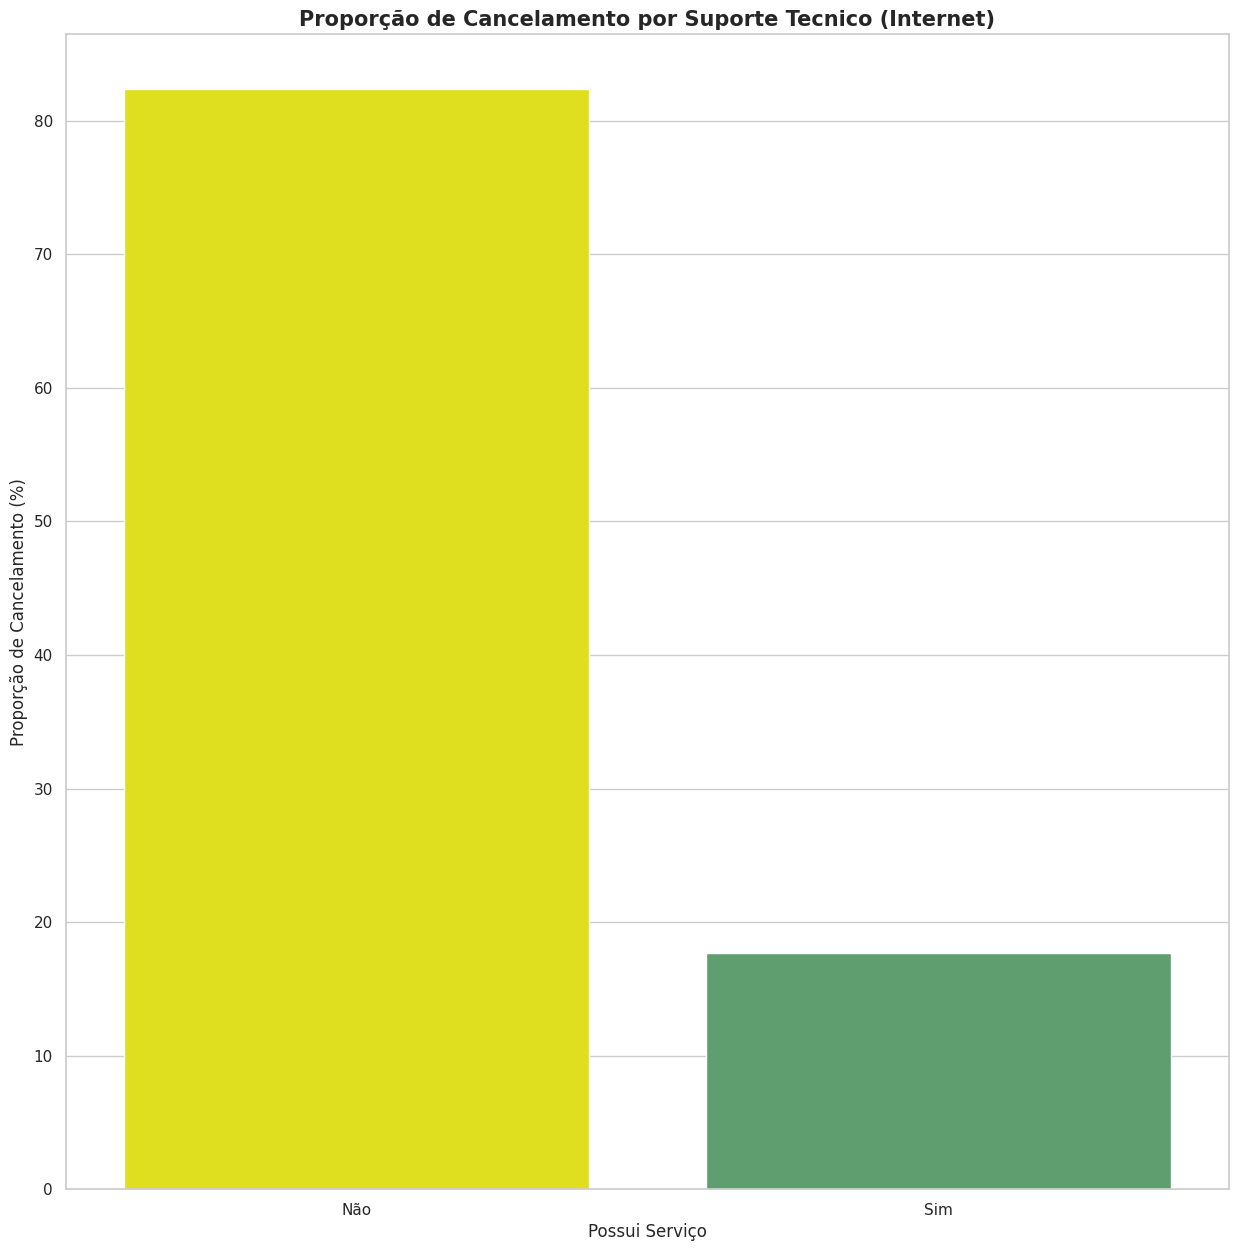

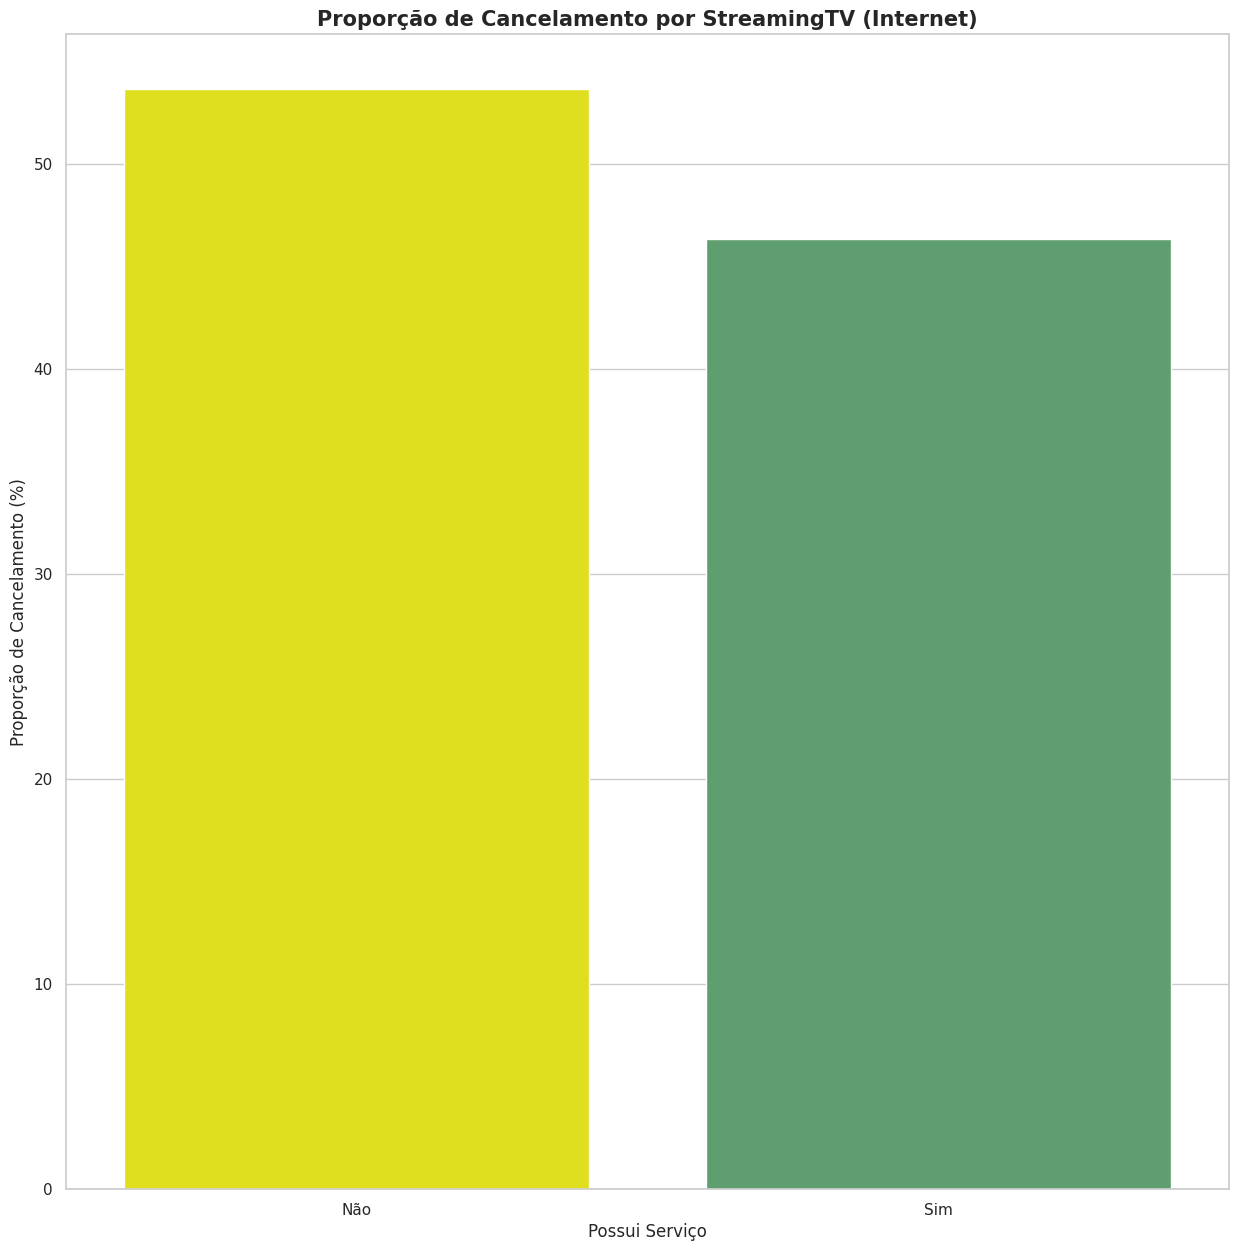

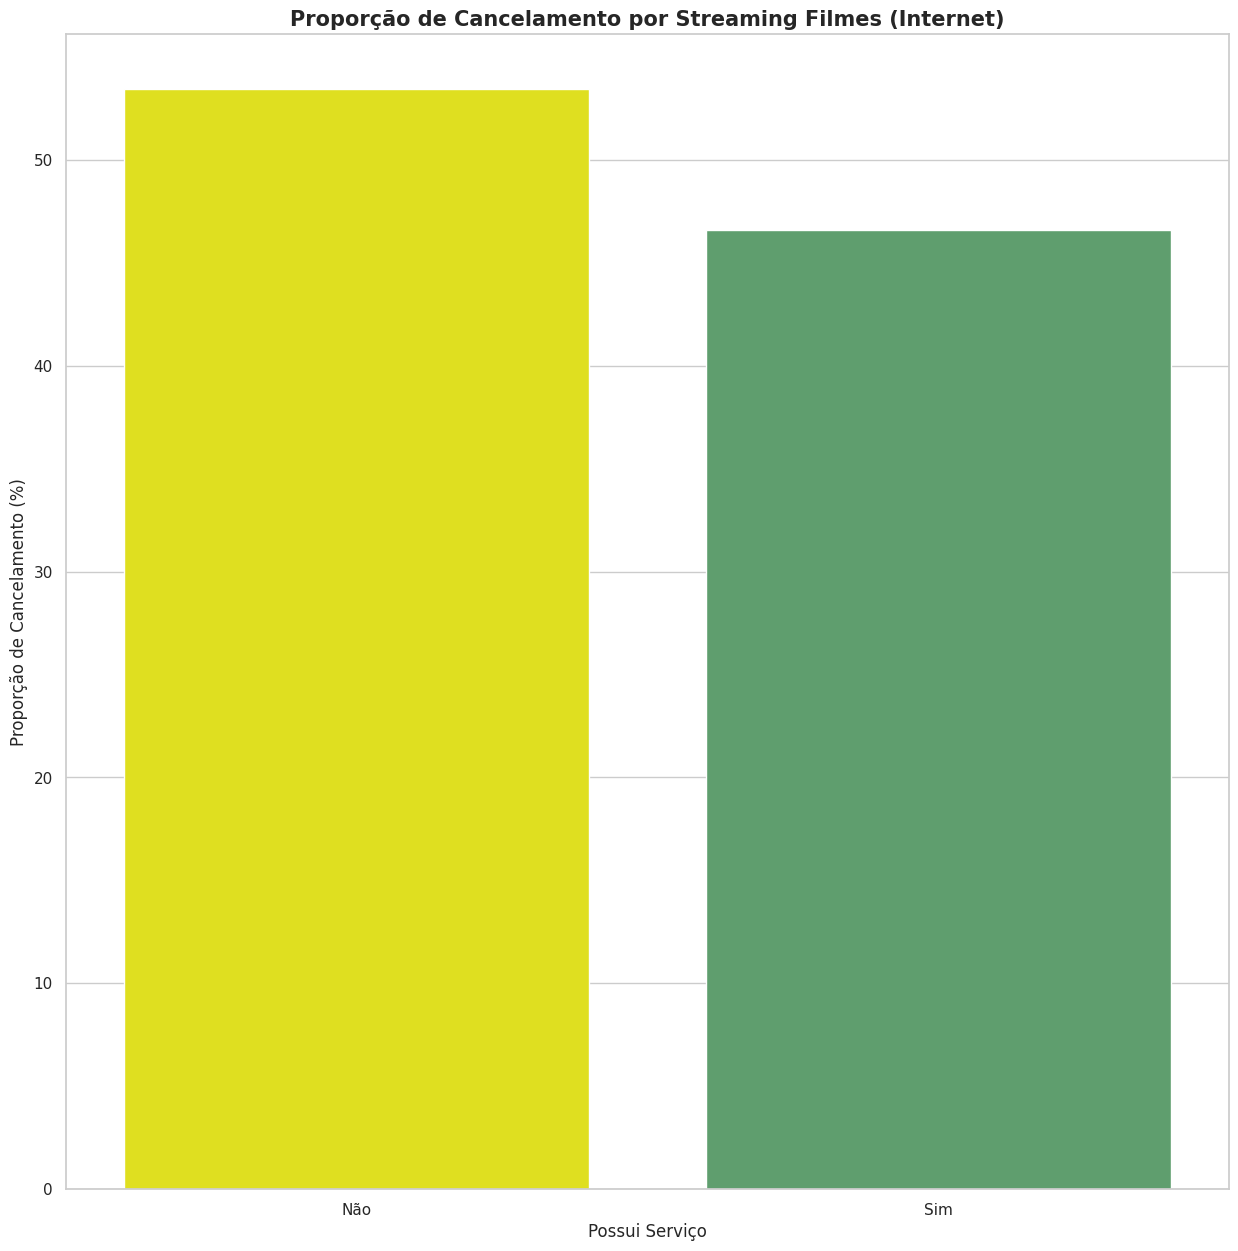

In [137]:
# Cancelamento por tipo de serviço de telefonia
servicos = ['telefone', 'telefone_LinhasMultiples',
            'internet_SegurancaOnline',
            'internet_BackupOnline','internet_ProtecaoDispositivo',
            'internet_SuporteTecnico', 'internet_StreamingTV',
            'internet_StreamingFilmes'
            ]

df_churn = df[df['Cancelamento'] == 1]

for servico in servicos:
  titulo = ['Telefone', 'Linhas Telefonicas Multiplas',
            'Segurança Online (Internet)',
            'Backup Online (Internet)','Proteçao do Dispositivo (Internet)',
            'Suporte Tecnico (Internet)', 'StreamingTV (Internet)',
            'Streaming Filmes (Internet)'
            ]
  churn_servicos = (df_churn[servico].value_counts(normalize=True) * 100).round(2)
  churn_servicos.index = ['Não', 'Sim']

  plt.figure(figsize=(15, 15))
  sns.barplot(x=churn_servicos.index, y=churn_servicos.values,
              hue=churn_servicos.index, palette=['yellow', 'g'])
  plt.title(f'Proporção de Cancelamento por {titulo[servicos.index(servico)]}',
            fontsize=15, fontweight='bold')
  plt.xlabel('Possui Serviço')
  plt.ylabel('Proporção de Cancelamento (%)')

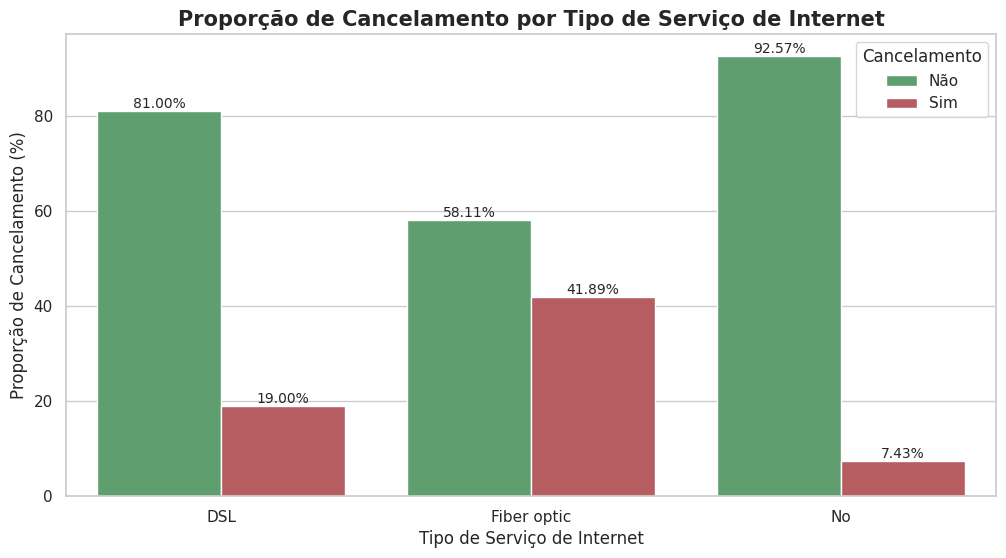

In [127]:
churn_internet = (df.groupby('internet')['Cancelamento'].value_counts(normalize=True) * 100).reset_index()

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x='internet', y='proportion', hue='Cancelamento', data=churn_internet, palette=['g', 'r'], ax=ax)

plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Proporção de Cancelamento (%)')
plt.title('Proporção de Cancelamento por Tipo de Serviço de Internet', fontsize=15, fontweight='bold')

L = plt.legend(title='Cancelamento')
L.get_texts()[0].set_text('Não')
L.get_texts()[1].set_text('Sim')

ax.bar_label(ax.containers[0], fontsize=10, fmt='%.2f%%')
ax.bar_label(ax.containers[1], fontsize=10, fmt='%.2f%%')

plt.show()

-----

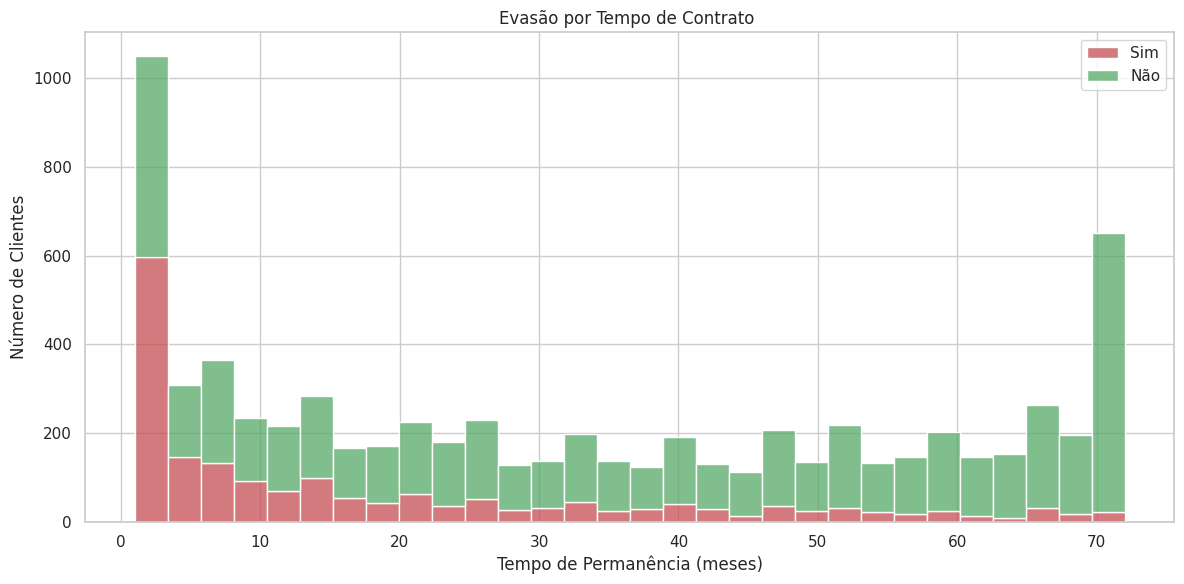

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tempo_de_contrato_cliente', hue='Cancelamento', bins=30, multiple='stack', palette=['g', 'r'])

plt.title('Evasão por Tempo de Contrato ')
plt.xlabel('Tempo de Permanência (meses)')
plt.ylabel('Número de Clientes')

plt.legend(['Sim', 'Não'])

plt.tight_layout()
plt.show()

/tmp/ipython-input-130-3207710038.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


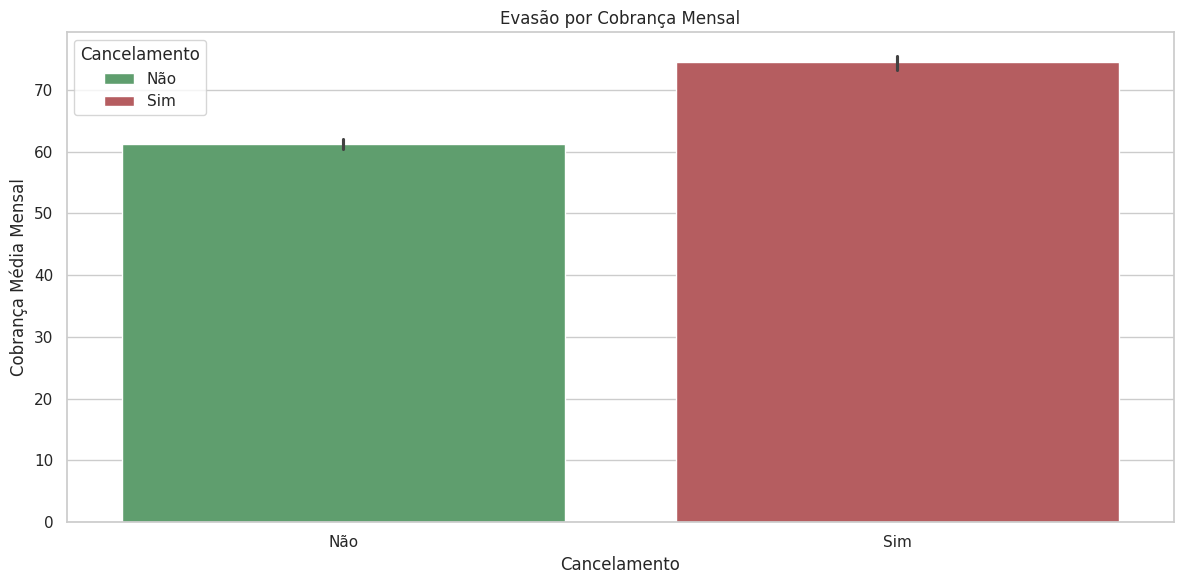

In [130]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df, x='Cancelamento', y='cobranca_mensal', hue='Cancelamento',
            palette=['g', 'r'], estimator='mean')

plt.title('Evasão por Cobrança Mensal')
plt.xlabel('Cancelamento')
plt.ylabel('Cobrança Média Mensal')

# Lengenda
L = plt.legend(title='Cancelamento')
L.get_texts()[0].set_text('Não')
L.get_texts()[1].set_text('Sim')

# Legenda Categorias
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Não'
labels[1] = 'Sim'
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()


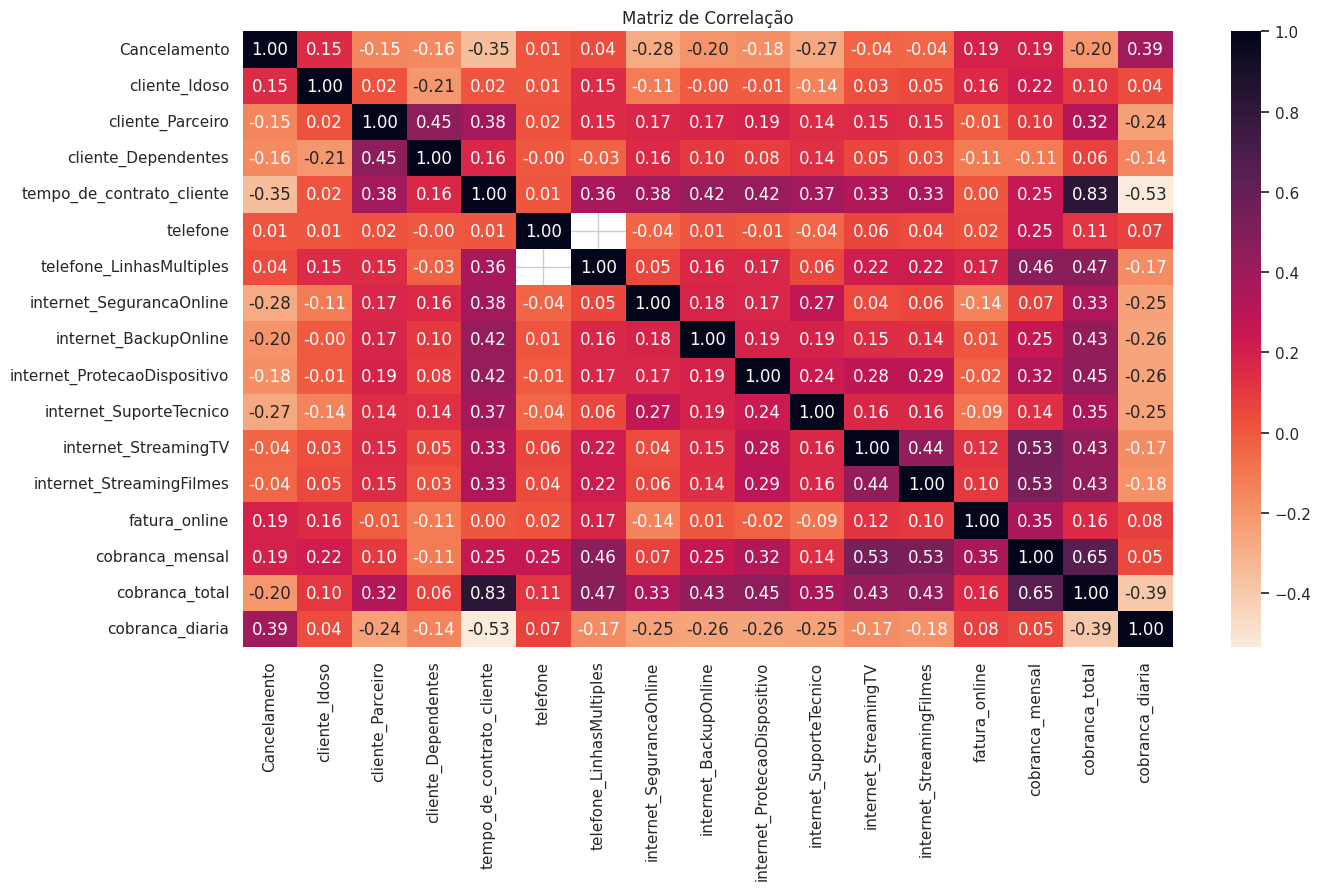

In [32]:
corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr, annot=True, cmap='rocket_r', fmt=".2f")

plt.title('Matriz de Correlação')
plt.show()

---

# Relatório - Análise de Evasão de Clientes (Churn) 📃

## 1. Introdução

Este relatório tem como objetivo analisar os dados de clientes da empresa **Telecom X**, com foco no problema de **evasão de clientes (churn)**. A alta taxa de cancelamento de contratos tem impactado negativamente a receita da empresa, e entender os principais fatores que levam à saída dos clientes é essencial para traçar estratégias de retenção.

---

## 2. Limpeza e Tratamento de Dados

Os seguintes passos foram realizados na preparação dos dados:

- **Importação dos dados** usando `pandas` e `requests`.
- Conversão de variáveis para valores binários (Sim = 1, Não = 0).

- Verificação e tratamento de **valores ausentes** ou inconsistentes.
- Conversão de colunas numéricas, como `cobranca_total` e `cobranca_mensal`, para o tipo adequado.
- Criação de colunas derivadas como `cobranca_diaria` para aprofundar a análise.

---

## 3. Análise Exploratória de Dados (EDA)

A análise exploratória buscou identificar padrões e fatores associados à evasão:

- Proporção de evasão por tipo e tempo de contrato.
- Proporção de evasão por gênero, idade e por tipos de serviços contratados.
- Visualizações em gráficos para facilitar a interpretação.
- Utilização da correlação (`.corr()`) para encontrar relações entre variáveis numéricas e o cancelamento.

**Principais descobertas visuais e estatísticas:**
- Maior taxa de cancelamento entre clientes com:
-- Contrato mensal (month-to-month)
-- Curto tempo de permanência (tenure baixo)
-- Serviço de internet (Fibra Óptica)
-- Clientes idoso

---

## 4. Conclusões e Insights

- A **evasão é mais frequente entre clientes novos**, especialmente nos primeiros 6 meses.
- O tipo de contrato é o fator mais influente: contratos mensais apresentam alta taxa de churn.
- Clientes que contratam serviços de segurança e suporte técnico tendem a cancelar com mais frequência — indicando possível insatisfação ou custo percebido alto.
- A fidelização aumenta com o tempo: clientes com mais de 2 anos de serviço tendem a permanecer.

---

## 5. Recomendações

1. Incentivar contratos anuais com benefícios exclusivos (descontos, bônus).
2. Melhorar a qualidade e percepção dos serviços técnicos (segurança, suporte, backup).
3. Programas de fidelidade para novos clientes que completem 6 meses.
4. Contato proativo com clientes em risco de cancelamento, especialmente nos primeiros meses de serviço.